In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
from scipy.stats import spearmanr
from math import sqrt
from sklearn.neighbors import NearestNeighbors


In [ ]:
# Load Data
ratings = pd.read_csv(r"C:\Users\RUTA\Desktop\masters of digital driven bussines\SDM\SDM assigment\New folder\movielens\ratings.csv")
movies = pd.read_csv(r"C:\Users\RUTA\Desktop\masters of digital driven bussines\SDM\SDM assigment\New folder\movielens\movies.csv")
users = pd.read_csv(r"C:\Users\RUTA\Desktop\masters of digital driven bussines\SDM\SDM assigment\New folder\movielens\users.csv")

In [4]:
# Merge datasets on UserID
userRating = pd.merge(ratings, users, on="UserID", how="inner")  # Use "left" if you want all ratings even if no user data exists

# Display the first few rows
print(userRating.head())

# Save merged dataset if needed
userRating.to_csv("C:/Users/asust/Downloads/merged_users_ratings.csv", index=False)

   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code
0       1     1193       5  978300760      F    1          10    48067
1       1      661       3  978302109      F    1          10    48067
2       1      914       3  978301968      F    1          10    48067
3       1     3408       4  978300275      F    1          10    48067
4       1     2355       5  978824291      F    1          10    48067


In [6]:
userRating.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [7]:
movies.head()   

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Check for missing values (NaN or null values)
print(userRating.isnull().sum())
print(movies.isnull().sum())

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64
MovieID    0
Title      0
Genres     0
dtype: int64


In [8]:
df = pd.merge(userRating, movies, on='MovieID', how='inner')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [9]:
df.drop(['Timestamp', 'Zip-code', 'Age', 'Occupation'], axis=1, inplace=True)

In [10]:
df.head()

,UserID,MovieID,Rating,Gender,Title,Genres
0,1,1193,5,F,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,F,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,F,My Fair Lady (1964),Musical|Romance
3,1,3408,4,F,Erin Brockovich (2000),Drama
4,1,2355,5,F,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [11]:
df.isnull().sum()

UserID     0
MovieID    0
Rating     0
Gender     0
Title      0
Genres     0
dtype: int64

### EDA

In [12]:
df.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [14]:
# It counts the occurrences of each genre in the 'genres' column using value_counts() method.
df['Genres'].value_counts()

Genres
Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: count, Length: 301, dtype: int64

In [15]:
# Perform Anderson-Darling test on 'rating' column
anderson_test = stats.anderson(df['Rating'], dist='norm')
print(f"Anderson-Darling Test statistic: {anderson_test.statistic}, critical values: {anderson_test.critical_values}")

# Interpretation of the output
if anderson_test.statistic > max(anderson_test.critical_values):
    print("Reject null hypothesis: Data is not normally distributed.")
else:
    print("Fail to reject null hypothesis: Data might be normal.")


Anderson-Darling Test statistic: 41032.73647330981, critical values: [0.576 0.656 0.787 0.918 1.092]
Reject null hypothesis: Data is not normally distributed.


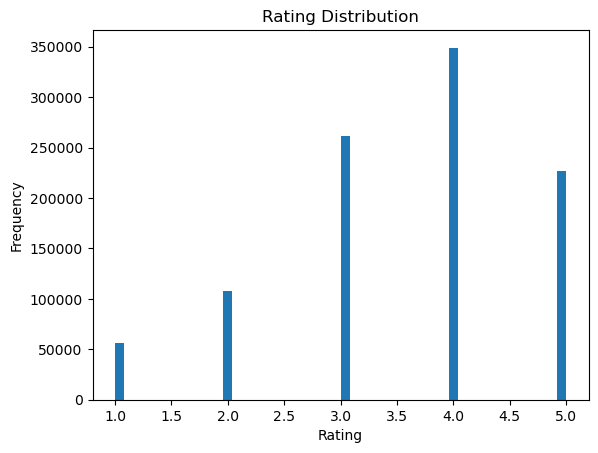

In [16]:
plt.hist(df['Rating'], bins=50)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

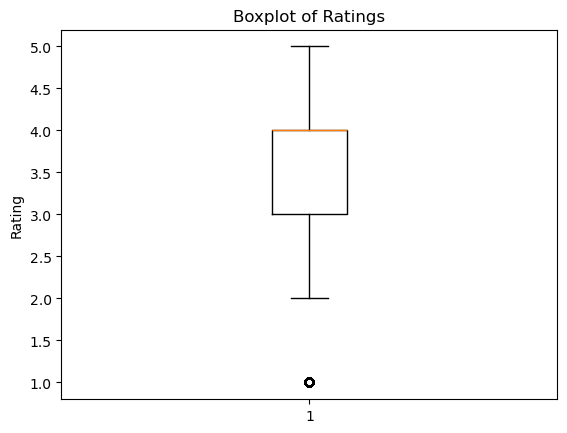

In [18]:
plt.boxplot(df['Rating'])
plt.title('Boxplot of Ratings')
plt.ylabel('Rating')
plt.show()

### Correlation Matrix

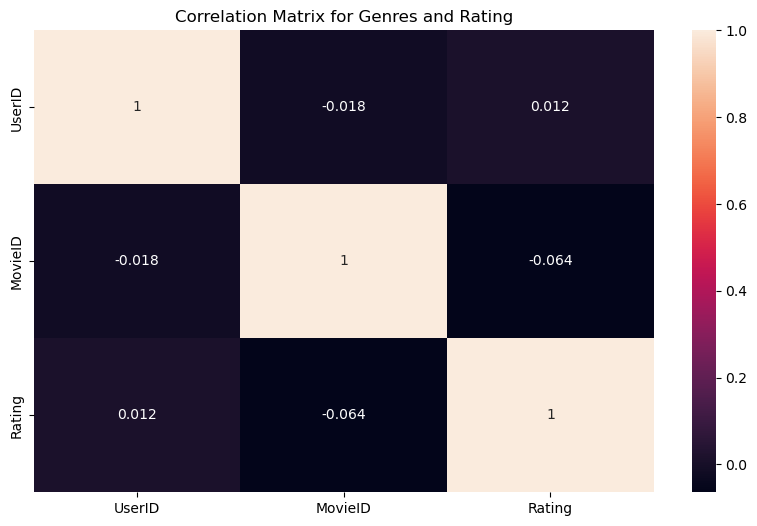

In [19]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Genres and Rating')
plt.show()


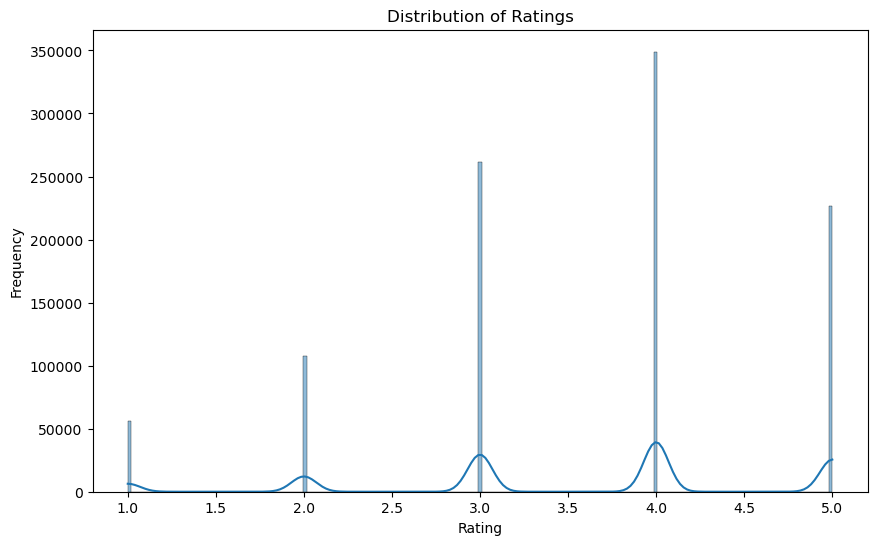

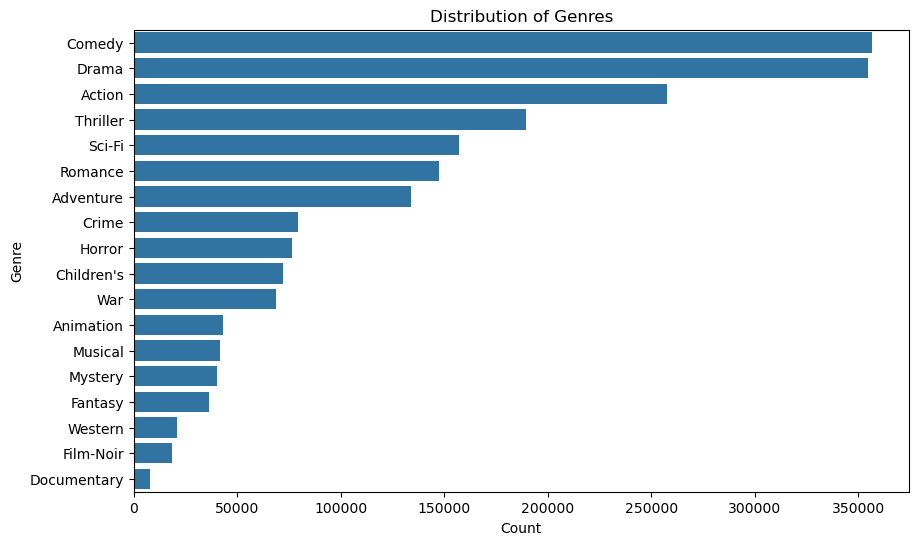

In [20]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Genres distribution
plt.figure(figsize=(10, 6))
genres = df['Genres'].str.split('|').explode()
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### encoding categorical values

In [21]:
# Extract genres and perform one-hot encoding
df_genres = movies.set_index('MovieID')['Genres'].str.get_dummies(sep='|')

In [22]:
df.head()

,UserID,MovieID,Rating,Gender,Title,Genres
0,1,1193,5,F,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,F,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,F,My Fair Lady (1964),Musical|Romance
3,1,3408,4,F,Erin Brockovich (2000),Drama
4,1,2355,5,F,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [24]:
# Extracting the number of genres per movie as a new feature
df['num_genres'] = df['Genres'].apply(lambda x: len(x.split('|')))
df.head()   

,UserID,MovieID,Rating,Gender,Title,Genres,num_genres
0,1,1193,5,F,One Flew Over the Cuckoo's Nest (1975),Drama,1
1,1,661,3,F,James and the Giant Peach (1996),Animation|Children's|Musical,3
2,1,914,3,F,My Fair Lady (1964),Musical|Romance,2
3,1,3408,4,F,Erin Brockovich (2000),Drama,1
4,1,2355,5,F,"Bug's Life, A (1998)",Animation|Children's|Comedy,3


In [25]:
# Correlation between 'rating' and 'num_genres'
spearman_corr, spearman_p_value = spearmanr(df['Rating'], df['num_genres'])
print(f"Spearman's Correlation Coefficient: {spearman_corr}, P-value: {spearman_p_value}")

# Interpretation of Spearman's correlation
if spearman_p_value < 0.05:
    if spearman_corr > 0:
        print("There is a statistically significant positive correlation between 'rating' and 'num_genres'.")
    elif spearman_corr < 0:
        print("There is a statistically significant negative correlation between 'rating' and 'num_genres'.")
    else:
        print("There is a statistically significant but no linear correlation between 'rating' and 'num_genres'.")
else:
    print("There is no statistically significant correlation between 'rating' and 'num_genres'.")


Spearman's Correlation Coefficient: -0.0008376462040757828, P-value: 0.40218076879727926
There is no statistically significant correlation between 'rating' and 'num_genres'.
